# Logistic Regression

z = wx + b

P = e^z / 1 + e^z

Loss Funtion L = -[Y log(P) + (1-Y) log(1-P)]

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("D:\PROJECT\wine.csv")

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [12]:
df['quality']

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

In [13]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [14]:
df['quality'].value_counts()

quality
good    855
bad     744
Name: count, dtype: int64

In [15]:
X = df.drop(['quality'], axis =1 )
y = df['quality']

In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(max_iter = 1000)

In [29]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [34]:
print(X_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.740625


In [41]:
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[107  34]
 [ 49 130]]


In [42]:
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         bad       0.69      0.76      0.72       141
        good       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
matrix = confusion_matrix(y_test, y_pred)

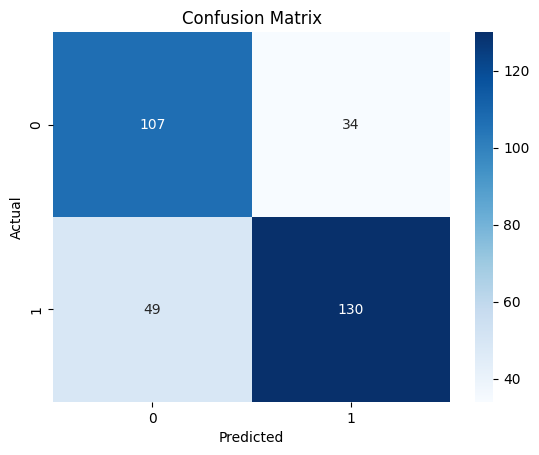

In [50]:
sns.heatmap(matrix, annot=True, cmap = 'Blues', fmt='d' )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()